In [1]:
import gzip
import pickle

import numpy as np
import graphviz
from sklearn import tree

In [7]:
balanced_fit = np.load(gzip.open('balanced_fit.npy.gz', 'rb'))
ordered_features = pickle.load(open('ordered_features', 'rb'))
ordered_features

['Coverage',
 'DP',
 'FS',
 'HRun',
 'HaplotypeScore',
 'MQ',
 'QD',
 'QUAL',
 'ReadPosRankSum']

# Decision Tree

In [3]:
train_X = balanced_fit[:,:-2]  #POS and errors
train_Y = balanced_fit[:,-1]

In [14]:
estimator = tree.DecisionTreeClassifier(max_depth=4)
tree_fit = estimator.fit(train_X, train_Y)
tree_fit.feature_importances_

array([0.00148319, 0.        , 0.01766789, 0.        , 0.        ,
       0.        , 0.00268066, 0.97045318, 0.00771508])

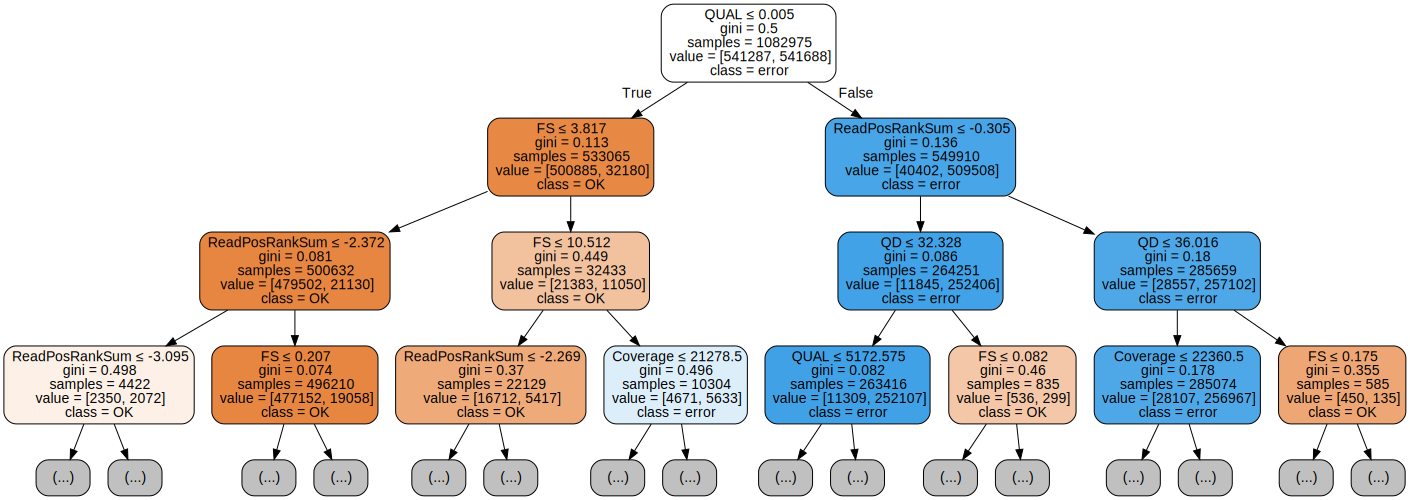

In [26]:
graphviz_representation = tree.export_graphviz(tree_fit, out_file=None,
                                               max_depth=3,
                                               feature_names=ordered_features,
                                               class_names = ['OK', 'error'],
                                               filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(graphviz_representation)
graph

In [19]:
ordered_features2 = list(ordered_features)
del ordered_features2[-2]
train_X2 = balanced_fit[:,:-4]
train_X2 = np.concatenate((train_X2, balanced_fit[:,-3:-2]), 1)
ordered_features2

['Coverage',
 'DP',
 'FS',
 'HRun',
 'HaplotypeScore',
 'MQ',
 'QD',
 'ReadPosRankSum']

In [20]:
estimator = tree.DecisionTreeClassifier(max_depth=3)
tree_fit2 = estimator.fit(train_X2, train_Y)
tree_fit2.feature_importances_

array([0.        , 0.        , 0.04446258, 0.        , 0.        ,
       0.        , 0.93627652, 0.0192609 ])

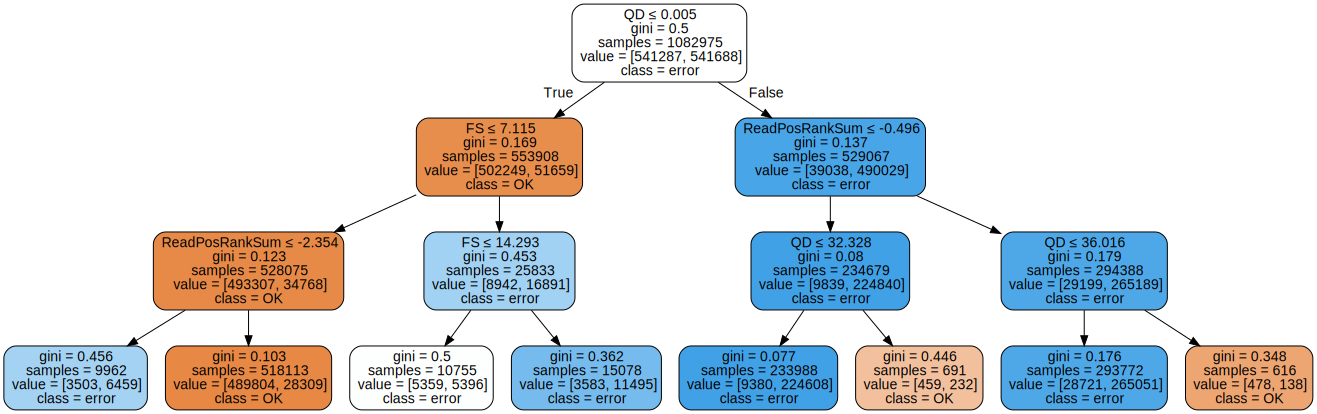

In [27]:
graphviz_representation = tree.export_graphviz(tree_fit2, out_file=None,
                                               max_depth=3,
                                               feature_names=ordered_features2,
                                               class_names = ['OK', 'error'],
                                               filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(graphviz_representation)
graph.render('1', format='png')
graph